<a href="https://colab.research.google.com/github/RPAlbuquerque/PhD-Dissertation---Paper-2/blob/main/Sales_Paper_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##🔥 Block 1: Load and Initial Overview (Sales - Paper 2)

In [ ]:
# 📌 Title: Load and Inspect Sales Data (August 2024)
import pandas as pd
import os

# Define input path
input_path = "/n/netscratch/cga/Lab/rpalbuquerque/Sales/sales_agosto_2024.csv"

# Load the full file with high memory efficiency
print("🔄 Loading sales data...")
sales_df = pd.read_csv(input_path, low_memory=False)
print("✅ Sales data loaded successfully.")

# Overview
print("\n📏 Dataset shape:", sales_df.shape)
print("\n🔤 Column types:")
print(sales_df.dtypes)

print("\n📍 First 5 rows:")
display(sales_df.head())

print("\n📉 Missing values per column:")
print(sales_df.isna().sum())

print("\n🎯 Unique value counts (first 10 columns):")
for col in sales_df.columns[:10]:
    print(f"- {col}: {sales_df[col].nunique()} unique values")

🔄 Loading sales data...
✅ Sales data loaded successfully.

📏 Dataset shape: (142724, 22)

🔤 Column types:
id                           int64
invoice_number               int64
date                        object
customer_id                 object
customer_name               object
product_code                 int64
product_description         object
items_quantity               int64
total_sales                float64
%_discount                 float64
address                     object
address_complement          object
address_number              object
neighborhood                object
zip_code                    object
city                        object
state                       object
customer_classification     object
profit_center               object
sales_rep                   object
company_code                object
price_list                  object
dtype: object

📍 First 5 rows:


,id,invoice_number,date,customer_id,customer_name,product_code,product_description,items_quantity,total_sales,%_discount,...,address_number,neighborhood,zip_code,city,state,customer_classification,profit_center,sales_rep,company_code,price_list
0,5777,779529,2024-08-02,44.554.050/0001-96,Vivaz Construtora e Incorporadora Ltda,57170041,Cj 2 Interrupt. Paralelos 10a/250v,3,38.22,0.0,...,617,Centro,62010820,Sobral,CE,Empresarial (Consumo),CD Faturamento CD,Romulo Ferreira de Mesquita,77 - Nordeste,1
1,7011,155084,2024-08-02,NI<!H%G$DCY?<.=_`KMG).,NI<!H%G$DCY?<.=_`KMG).,57402006,Plugue Angular 2p 10a/250v Branco,1,3.90,0.0,...,-,-,-,-,-,-,Varejo/TStore,-,31 - T Factory Store,#ND
2,7012,155084,2024-08-02,NI<!H%G$DCY?<.=_`KMG).,NI<!H%G$DCY?<.=_`KMG).,57402110,Plugue Angular 2p+T 10a/250v Br,1,10.00,0.0,...,-,-,-,-,-,-,Varejo/TStore,-,31 - T Factory Store,#ND
3,7130,185832,2024-08-03,NI<!H%G$DCY?<.=_`KMG).,NI<!H%G$DCY?<.=_`KMG).,57545052,"Fita Isolante Verde 10m 0,13x19mm",1,4.00,0.0,...,-,-,-,-,-,-,Varejo/TStore,-,31 - T Factory Store,#ND
4,7131,185832,2024-08-03,NI<!H%G$DCY?<.=_`KMG).,NI<!H%G$DCY?<.=_`KMG).,57545053,"Fita Isolante Azul 10m 0,13x19mm",1,4.00,0.0,...,-,-,-,-,-,-,Varejo/TStore,-,31 - T Factory Store,#ND



📉 Missing values per column:
id                            0
invoice_number                0
date                          0
customer_id                   0
customer_name                 0
product_code                  0
product_description           0
items_quantity                0
total_sales                   0
%_discount                    0
address                       0
address_complement         5349
address_number                0
neighborhood                  0
zip_code                      0
city                          0
state                         0
customer_classification       0
profit_center                 0
sales_rep                     0
company_code                  0
price_list                    0
dtype: int64

🎯 Unique value counts (first 10 columns):
- id: 142724 unique values
- invoice_number: 16224 unique values
- date: 31 unique values
- customer_id: 7642 unique values
- customer_name: 7612 unique values
- product_code: 2266 unique values
- product_descr

In [ ]:
##🔍 Block 2: Data Quality & Temporal Distribution

📆 Date range: 2024-08-01 00:00:00 → 2024-08-31 00:00:00


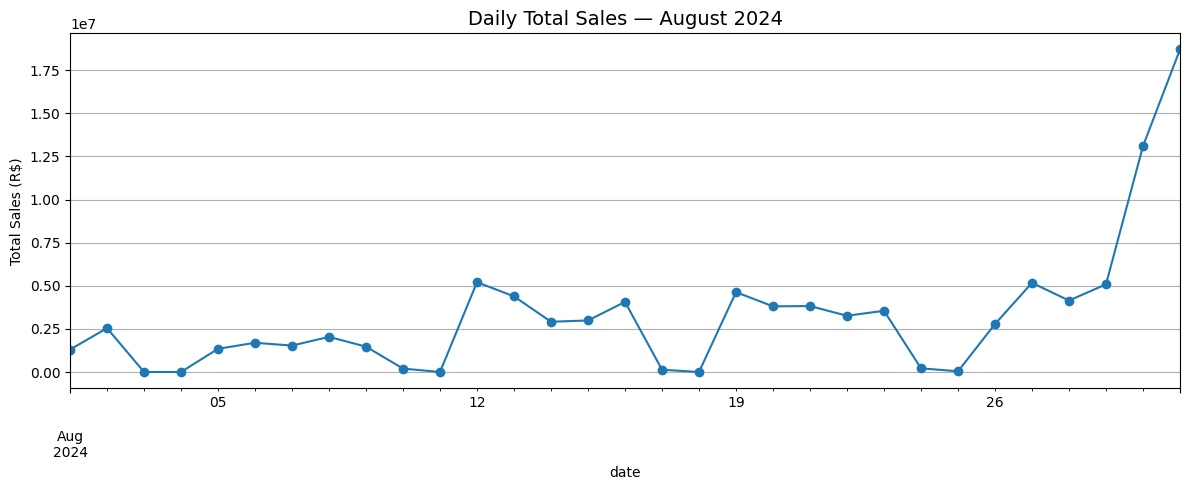

In [ ]:
# 📌 Title: Clean Column Names and Explore Date Distribution
import matplotlib.pyplot as plt

# Padroniza nomes das colunas (sem espaços, lowercase, com underscore)
sales_df.columns = sales_df.columns.str.strip().str.lower().str.replace(' ', '_')

# Converte coluna de data
sales_df['date'] = pd.to_datetime(sales_df['date'], errors='coerce')

# Confere intervalo temporal
print("📆 Date range:", sales_df['date'].min(), "→", sales_df['date'].max())

# Plot diário de vendas agregadas
daily_sales = sales_df.groupby('date')['total_sales'].sum()

plt.figure(figsize=(12, 5))
daily_sales.plot(marker='o')
plt.title('Daily Total Sales — August 2024', fontsize=14)
plt.ylabel('Total Sales (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
##🧭 Block 3: Geographical Overview (by State and City)

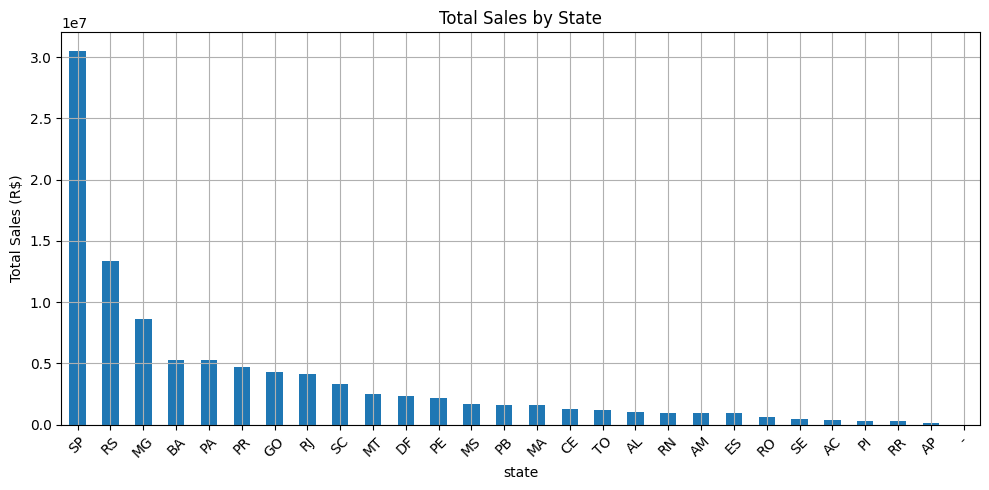

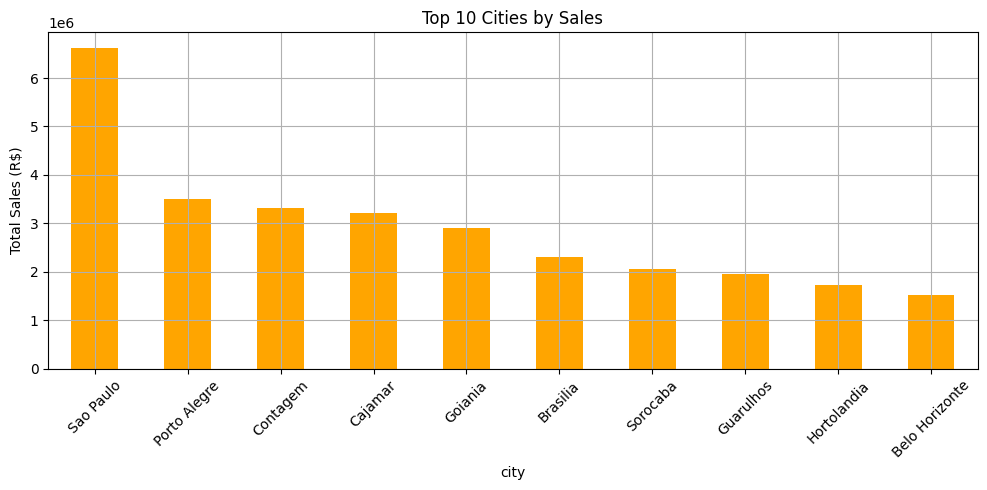

In [ ]:
# 📌 Title: Geographic Distribution of Sales
# Vendas por estado
state_sales = sales_df.groupby('state')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
state_sales.plot(kind='bar')
plt.title('Total Sales by State')
plt.ylabel('Total Sales (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

# Top 10 cidades com maior venda
city_sales = sales_df.groupby('city')['total_sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
city_sales.plot(kind='bar', color='orange')
plt.title('Top 10 Cities by Sales')
plt.ylabel('Total Sales (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
##💰 Block 4: Top Products and Discounts

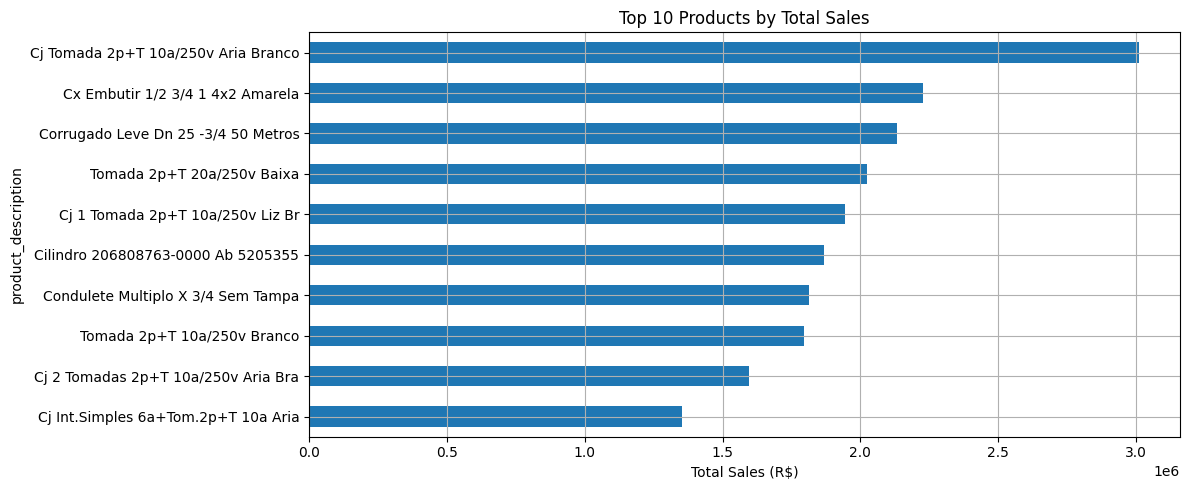

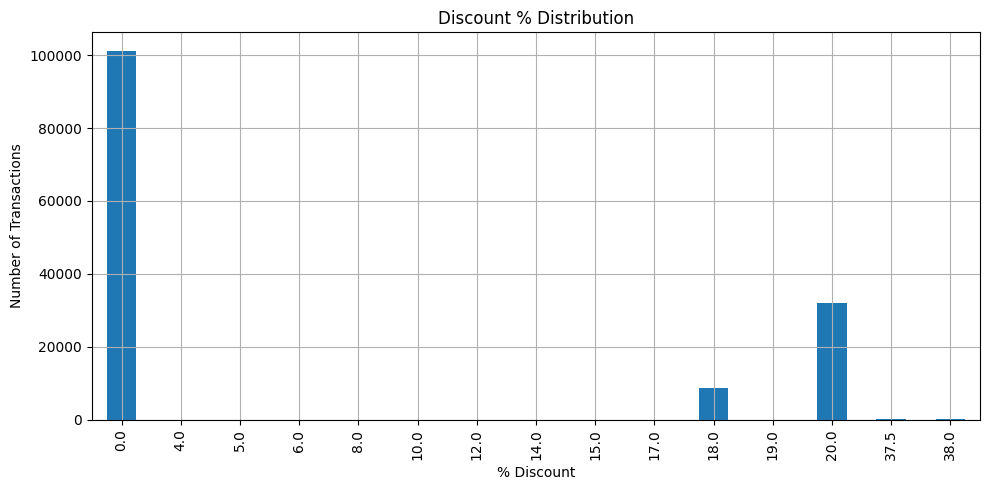

In [ ]:
# 📌 Title: Top-Selling Products and Discount Usage

# Produtos mais vendidos em valor total
top_products = (
    sales_df.groupby('product_description')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 5))
top_products.plot(kind='barh')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Total Sales (R$)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

# Análise de descontos aplicados
discount_counts = sales_df['%_discount'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
discount_counts.plot(kind='bar')
plt.title('Discount % Distribution')
plt.xlabel('% Discount')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Electrical products such as outlets, embedded boxes, conduits, and cylinders dominate — consistent with Tramontina Eletrik’s portfolio.
#The “2p+T Aria Branco” outlet leads with nearly R$ 3 million in sales — a strong indicator of a flagship product.

In [ ]:
##💾 Block 5: Save Aggregated Data

In [ ]:
# 📌 Title: Save Aggregated Sales Data

import os

# Output folder
output_dir = "/n/netscratch/cga/Lab/rpalbuquerque/Sales/aggregates/"
os.makedirs(output_dir, exist_ok=True)

# Aggregations
sales_by_day = sales_df.groupby('date')['total_sales'].sum().reset_index()
sales_by_state = sales_df.groupby('state')['total_sales'].sum().reset_index()
sales_by_city = sales_df.groupby('city')['total_sales'].sum().reset_index()

# Save as compressed CSVs
sales_by_day.to_csv(os.path.join(output_dir, "sales_by_day.csv.gz"), index=False, compression='gzip')
sales_by_state.to_csv(os.path.join(output_dir, "sales_by_state.csv.gz"), index=False, compression='gzip')
sales_by_city.to_csv(os.path.join(output_dir, "sales_by_city.csv.gz"), index=False, compression='gzip')

print("✅ Aggregated files saved successfully:")
print(" - sales_by_day.csv.gz")
print(" - sales_by_state.csv.gz")
print(" - sales_by_city.csv.gz")

✅ Aggregated files saved successfully:
 - sales_by_day.csv.gz
 - sales_by_state.csv.gz
 - sales_by_city.csv.gz


In [ ]:
##📌 Bloco 6 — Customer-Level Sales Analysis

In [ ]:
# 📌 Title: Customer-Level Sales Analysis

# Faturamento por cliente
customer_sales = (
    sales_df.groupby(['customer_id', 'customer_name'])['total_sales']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

print("🏅 Top 10 clients by total sales:")
display(customer_sales.head(10))

# Número de pedidos por cliente
customer_orders = (
    sales_df.groupby(['customer_id', 'customer_name'])['invoice_number']
    .nunique()
    .reset_index()
    .rename(columns={'invoice_number': 'unique_invoices'})
    .sort_values('unique_invoices', ascending=False)
)

print("📦 Top 10 clients by number of invoices:")
display(customer_orders.head(10))

# Ticket médio por cliente
customer_metrics = (
    sales_df.groupby(['customer_id', 'customer_name'])
    .agg(total_sales=('total_sales', 'sum'),
         total_items=('items_quantity', 'sum'),
         num_invoices=('invoice_number', 'nunique'))
    .reset_index()
)

customer_metrics['avg_ticket'] = customer_metrics['total_sales'] / customer_metrics['num_invoices']
customer_metrics = customer_metrics.sort_values(by='total_sales', ascending=False)

print("💰 Top 10 clients by average ticket value:")
display(customer_metrics[['customer_name', 'total_sales', 'num_invoices', 'avg_ticket']].head(10))

🏅 Top 10 clients by total sales:


,customer_id,customer_name,total_sales
0,47.674.429/0003-90,Andra S a Electric Solutions,3.561204e+06
1,17.359.233/0001-88,Tecidos e Armarinhos Miguel Bartolomeu Sa,2.921333e+06
2,57.000.036/0001-92,Schaeffler Brasil Ltda.,1.869278e+06
3,02.990.605/0009-50,Magneti Marelli Sist Automotivos Ind e Com Ltda,1.694259e+06
4,43.486.604/0001-00,Elecon Industria e Comercio Ltda.,1.299776e+06
5,33.000.167/0809-70,Petroleo Brasileiro S.A,1.250953e+06
6,69.194.454/0001-47,Cofema Atacadista Ltda,1.196640e+06
7,97.181.515/0001-77,Diferpan Comercio Importacao e Exportacao Ltda,1.153128e+06
8,76.639.285/0003-39,Ferragens Negrao Coml Lt,1.147987e+06
9,23.797.376/0001-74,Bartofil Distribuidora Sa,1.147401e+06


📦 Top 10 clients by number of invoices:


,customer_id,customer_name,unique_invoices
7349,NI<!H%G$DCY?<.=_`KMG).,NI<!H%G$DCY?<.=_`KMG).,172
580,03.340.997/0001-17,Tramontina Varejo Utilidades Ltda,169
1684,09.276.383/0001-08,Aguiar & Aguiar Alternativa de Negocios Ltda,161
836,04.608.850/0001-28,Associacao Redemac de Lojas de Materiais de Co...,120
2534,15.375.991/0001-64,Todimo Materiais para Construcao S.A.,120
5439,76.639.285/0003-39,Ferragens Negrao Coml Lt,111
3302,24.583.256/0001-37,Rede Granteck Ltda,104
5772,96.418.264/0001-39,Lojas Quero-Quero S.A.,79
2696,17.359.233/0001-88,Tecidos e Armarinhos Miguel Bartolomeu Sa,75
4814,47.674.429/0003-90,Andra S a Electric Solutions,69


💰 Top 10 clients by average ticket value:


,customer_name,total_sales,num_invoices,avg_ticket
4814,Andra S a Electric Solutions,3.561204e+06,69,51611.646812
2696,Tecidos e Armarinhos Miguel Bartolomeu Sa,2.921333e+06,75,38951.103733
5224,Schaeffler Brasil Ltda.,1.869278e+06,4,467319.565000
513,Magneti Marelli Sist Automotivos Ind e Com Ltda,1.694259e+06,16,105891.213750
4572,Elecon Industria e Comercio Ltda.,1.299776e+06,36,36104.892221
3908,Petroleo Brasileiro S.A,1.250953e+06,2,625476.410000
5371,Cofema Atacadista Ltda,1.196640e+06,41,29186.332683
5785,Diferpan Comercio Importacao e Exportacao Ltda,1.153128e+06,29,39763.031034
5439,Ferragens Negrao Coml Lt,1.147987e+06,111,10342.226306
3229,Bartofil Distribuidora Sa,1.147401e+06,25,45896.046000


In [ ]:
##📌 Block 7 — Sales by Customer Classification

🎯 Unique customer classifications:
customer_classification
Varejo                          109131
Atacado/Distribuidor             14610
Home Center                       6146
Pessoa Fisica                     6136
Empresarial (Consumo)             3373
Construtora                       1155
Autosservico                       565
-                                  415
E-Commerce                         410
Eletromoveis                       341
Departamental-Artigos do Lar       315
Consumidor                         122
Promo                                4
Fornecedor                           1
Name: count, dtype: int64
📊 Sales summary by customer classification:


,customer_classification,total_sales,total_items,num_invoices,num_customers,avg_ticket
13,Varejo,6.060757e+07,13606019,10921,4853,5549.635459
1,Atacado/Distribuidor,2.847166e+07,9449402,1814,363,15695.511452
10,Home Center,3.836298e+06,815777,491,203,7813.235110
8,Empresarial (Consumo),3.773136e+06,463548,498,319,7576.579123
6,E-Commerce,1.262396e+06,282194,119,13,10608.365713
3,Construtora,7.638742e+05,157916,178,107,4291.427978
2,Autosservico,3.753923e+05,69371,52,29,7219.082850
11,Pessoa Fisica,3.599288e+05,35176,2009,1806,179.158182
5,Departamental-Artigos do Lar,3.358197e+05,66683,28,10,11993.560714
7,Eletromoveis,3.175060e+05,70166,40,9,7937.650500


/tmp/ipykernel_2728262/347793727.py:34: UserWarning: Glyph 127991 (\N{LABEL}) missing from current font.
  plt.tight_layout()
/n/home03/rpereiraalbuquerque/meu_ambiente_bertopic/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127991 (\N{LABEL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


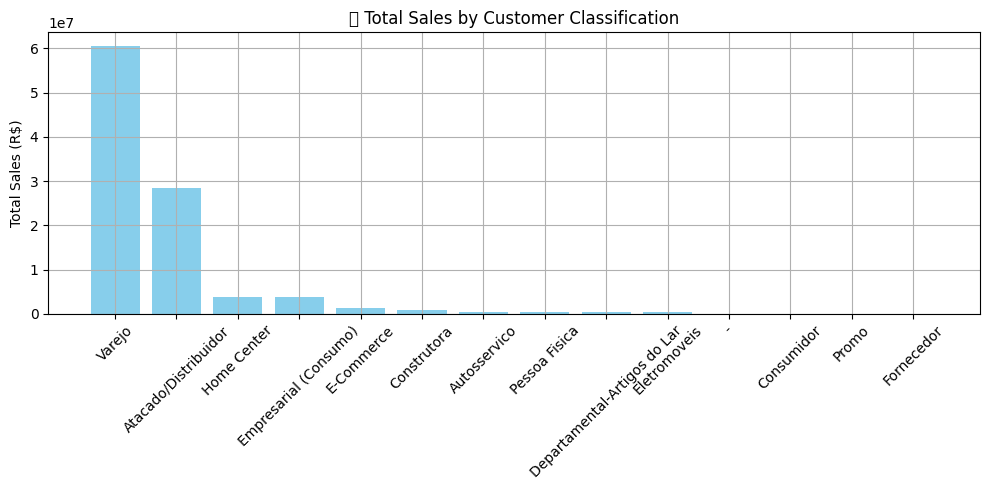

In [ ]:
# 📌 Title: Sales by Customer Classification

# Verifica valores únicos para entender categorias
print("🎯 Unique customer classifications:")
print(sales_df['customer_classification'].value_counts())

# Agrega vendas por tipo de cliente
classification_stats = (
    sales_df.groupby('customer_classification')
    .agg(
        total_sales=('total_sales', 'sum'),
        total_items=('items_quantity', 'sum'),
        num_invoices=('invoice_number', 'nunique'),
        num_customers=('customer_id', 'nunique')
    )
    .reset_index()
)

# Calcula ticket médio
classification_stats['avg_ticket'] = classification_stats['total_sales'] / classification_stats['num_invoices']
classification_stats = classification_stats.sort_values(by='total_sales', ascending=False)

print("📊 Sales summary by customer classification:")
display(classification_stats)

# Plot total de vendas por classificação
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(classification_stats['customer_classification'], classification_stats['total_sales'], color='skyblue')
plt.title('🏷️ Total Sales by Customer Classification')
plt.ylabel('Total Sales (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
### 📌 Insight — Customer Classification Impact on Sales
#A análise por classificação de cliente revela que a maior parte do faturamento da Tramontina Eletrik em agosto de 2024 foi gerada por dois segmentos:
#- **Varejo**: responsável por **R$ 60,6 milhões (62,3%)**, com **4.853 clientes distintos** e ticket médio de **R$ 5.549**. Trata-se de um canal altamente pulverizado e de menor valor por transação.
#- **Atacado/Distribuidor**: gerou **R$ 28,4 milhões (29,2%)**, com apenas **363 clientes**, mas ticket médio expressivo de **R$ 15.695**. É um canal concentrado, com forte impacto unitário.
#Outros segmentos, como *Home Center* e *Empresarial (Consumo)*, contribuem de forma moderada, enquanto *Pessoa Física* e *Promo* são residuais.
#Esse padrão de concentração sugere que os modelos de previsão de vendas e análise geográfica devem considerar a **natureza do canal de venda** como variável moderadora. Canais diferentes expressam lógicas comerciais distintas: pulverização territorial no varejo vs. concentração logística no atacado.


In [ ]:
##📌 Bloco 8 — Create Full Address for Geocoding

In [ ]:
# 📌 Title: Construct Full Address for Geolocation

# Criação da coluna de endereço completo (full_address)
sales_df['full_address'] = (
    sales_df['address'].fillna('') + ', ' +
    sales_df['address_number'].fillna('') + ', ' +
    sales_df['neighborhood'].fillna('') + ', ' +
    sales_df['city'].fillna('') + ' - ' +
    sales_df['state'].fillna('')
)

# Visualização de exemplo
print("🏠 Sample full addresses:")
display(sales_df[['full_address']].drop_duplicates().sample(5, random_state=42))

🏠 Sample full addresses:


,full_address
89215,"R Minas Gerais, 946, Centro, Catanduva - SP"
139536,"Rua Dona Inacia Uchoa, 621, Vila Mariana, Sao ..."
89211,"Avenida Guido Della Togna, 341, P V Real, Novo..."
141548,"Rod. Br 116, S/N, Rincao, Colombo - PR"
50018,"Rua Sete de Setembro, 1161, Centro, Palotina - PR"


In [ ]:
##📦 Bloco 8B – Export Unique Addresses for Geocoding

In [ ]:
# 📌 Title: Export Unique Addresses for Geocoding

# Cria diretório de saída se necessário
output_dir = "/n/netscratch/cga/Lab/rpalbuquerque/Sales/geocoding/"
os.makedirs(output_dir, exist_ok=True)

# Extrai endereços únicos
unique_addresses = sales_df[['full_address']].drop_duplicates()

# Salva para geocodificação externa
unique_addresses.to_csv(
    os.path.join(output_dir, "unique_addresses.csv.gz"),
    index=False,
    compression='gzip'
)

print("✅ File saved: unique_addresses.csv.gz")
print("👉 Ready for external geocoding (Google/Nominatim/etc).")

✅ File saved: unique_addresses.csv.gz
👉 Ready for external geocoding (Google/Nominatim/etc).


In [ ]:
##📌 Bloco 8C – Merge Coordinates and Map Census Sector

In [ ]:
# 📌 Title: Create Geocoding Template & Prepare for Spatial Join

import pandas as pd
import os
from shapely.geometry import Point
from shapely import prepared
from shapely.ops import transform
from functools import partial
import pyogrio
import pyproj

# Paths
geocoding_dir = "/n/netscratch/cga/Lab/rpalbuquerque/Sales/geocoding/"
template_path = os.path.join(geocoding_dir, "unique_addresses_template.csv")
input_coords_path = os.path.join(geocoding_dir, "unique_addresses_with_coords.csv.gz")
output_path = "/n/netscratch/cga/Lab/rpalbuquerque/Sales/sales_with_census_sector.csv.gz"
shapefile_path = "/n/netscratch/cga/Lab/SETORES_CENSITARIOS/BR_setores_2022.shp"  # Update if needed

# Step 1 – Save geocoding template
os.makedirs(geocoding_dir, exist_ok=True)
template_df = sales_df[['full_address']].drop_duplicates().copy()
template_df['latitude'] = ''
template_df['longitude'] = ''
template_df.to_csv(template_path, index=False)
print(f"✅ Geocoding template created: {template_path}")

# Step 2 – Load geocoded coordinates if already available
if os.path.exists(input_coords_path):
    print(f"📥 Found geocoded file: {input_coords_path}")

    coords_df = pd.read_csv(input_coords_path)
    coords_df.columns = coords_df.columns.str.lower().str.strip()

    assert {'full_address', 'latitude', 'longitude'}.issubset(coords_df.columns)

    # Merge with sales data
    sales_geo = pd.merge(sales_df, coords_df, on='full_address', how='left')
    sales_geo['geometry'] = sales_geo.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

    # Reproject to EPSG:4674 (SIRGAS 2000)
    project_to_4674 = partial(
        pyproj.transform,
        pyproj.CRS("EPSG:4326"),
        pyproj.CRS("EPSG:4674")
    )
    sales_geo['geometry_proj'] = sales_geo['geometry'].apply(lambda g: transform(project_to_4674, g))

    # Load census sector shapefile
    setores_df = pyogrio.read_dataframe(shapefile_path, columns=["CD_GEOCODI", "geometry"])

    # Spatial join: point-in-polygon
    print("🔁 Mapping geocoded points to census tracts...")
    prep_setores = [(prepared.prep(geom), code) for geom, code in zip(setores_df.geometry, setores_df.CD_GEOCODI)]

    def match_sector(point):
        for prep_geom, code in prep_setores:
            if prep_geom.contains(point):
                return code
        return None

    sales_geo['census_sector'] = sales_geo['geometry_proj'].apply(match_sector)

    # Save final file
    sales_geo.to_csv(output_path, index=False, compression='gzip')
    print(f"✅ Final file saved with census sector: {output_path}")

else:
    print("⚠️ Geocoded file not found.")
    print(f"👉 Please fill and save as: {input_coords_path}")
    print("Columns required: full_address, latitude, longitude (in WGS84)")

✅ Geocoding template created: /n/netscratch/cga/Lab/rpalbuquerque/Sales/geocoding/unique_addresses_template.csv
⚠️ Geocoded file not found.
👉 Please fill and save as: /n/netscratch/cga/Lab/rpalbuquerque/Sales/geocoding/unique_addresses_with_coords.csv.gz
Columns required: full_address, latitude, longitude (in WGS84)


In [ ]:
##🔢 Block 9 — Prepare Full Address for Geocoding

In [ ]:
# Title: Prepare Full Address Column for Geocoding (Brazil)
import pandas as pd

# Load original sales data
input_path = "/n/netscratch/cga/Lab/rpalbuquerque/Sales/sales_agosto_2024.csv"
df = pd.read_csv(input_path)

# Construct full address string for geocoding
df["full_address"] = (
    df["address"].fillna('') + ", " +
    df["address_number"].fillna('') + ", " +
    df["neighborhood"].fillna('') + ", " +
    df["city"].fillna('') + ", " +
    df["state"].fillna('') + ", " +
    df["zip_code"].fillna('') + ", Brasil"
)

# Save to CSV for ArcGIS Pro geocoding
output_path = "/n/netscratch/cga/Lab/rpalbuquerque/Sales/sales_for_geocoding.csv"
df[["id", "full_address"]].to_csv(output_path, index=False)

print("✅ Full address CSV saved for geocoding at:", output_path)

✅ Full address CSV saved for geocoding at: /n/netscratch/cga/Lab/rpalbuquerque/Sales/sales_for_geocoding.csv


In [ ]:
# Title: Preview Columns of Sales Address File

import pandas as pd

# File path
file_path = "/n/netscratch/cga/Lab/rpalbuquerque/Sales/sales_for_geocoding.csv"

# Load only the header (no need to load entire dataset)
try:
    df_sample = pd.read_csv(file_path, nrows=5)
    print("✅ Columns in the file:\n")
    for col in df_sample.columns:
        print(f"• {col}")
except Exception as e:
    print("❌ Error reading the file:")
    print(e)

✅ Columns in the file:

• id
• full_address


In [ ]:
##Block 9.A - Geocoded data (Lat & Long)

In [ ]:
# Title: Robust Shapefile Reader for Sales Data (No GeoPandas)

import sys
!{sys.executable} -m pip install pyshp

import shapefile
import pandas as pd

# Path to your shapefile
shapefile_path = "/n/netscratch/cga/Lab/rpalbuquerque/Sales/Gocoded/MyProject1.shp"

# Load shapefile
sf = shapefile.Reader(shapefile_path)

# Get field names (excluding DeletionFlag)
fields = [field[0] for field in sf.fields[1:]]

# Get records and shapes
records = sf.records()
shapes = sf.shapes()

# Convert to DataFrame
df = pd.DataFrame(records, columns=fields)

# Safely extract coordinates (handling empty geometries)
longitudes = []
latitudes = []

for shape in shapes:
    if shape.points and len(shape.points[0]) == 2:
        longitudes.append(shape.points[0][0])
        latitudes.append(shape.points[0][1])
    else:
        longitudes.append(None)
        latitudes.append(None)

df["Longitude"] = longitudes
df["Latitude"] = latitudes

# Display result
print("✅ Shapefile loaded with geometry handling.")
print("📌 Preview:")
display(df.head())

print("\n📊 DataFrame Info:")
df.info()

✅ Shapefile loaded with geometry handling.
📌 Preview:


,Status,Score,Match_type,Match_addr,LongLabel,ShortLabel,Addr_type,Type,PlaceName,Place_addr,...,Xmin,Xmax,Ymin,Ymax,ExInfo,IN_SingleL,USER_id,USER_full_,Longitude,Latitude
0,U,0.0,A,,,,,,,,...,0.0,0.0,0.0,0.0,,"-, -, -, -, -, -, Brasil",7130,"-, -, -, -, -, -, Brasil",NaN,NaN
1,U,0.0,A,,,,,,,,...,0.0,0.0,0.0,0.0,,"-, -, -, -, -, -, Brasil",7131,"-, -, -, -, -, -, Brasil",NaN,NaN
2,U,0.0,A,,,,,,,,...,0.0,0.0,0.0,0.0,,"-, -, -, -, -, -, Brasil",7132,"-, -, -, -, -, -, Brasil",NaN,NaN
3,U,0.0,A,,,,,,,,...,0.0,0.0,0.0,0.0,,"-, -, -, -, -, -, Brasil",7133,"-, -, -, -, -, -, Brasil",NaN,NaN
4,U,0.0,A,,,,,,,,...,0.0,0.0,0.0,0.0,,"-, -, -, -, -, -, Brasil",7134,"-, -, -, -, -, -, Brasil",NaN,NaN



📊 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142724 entries, 0 to 142723
Data columns (total 63 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Status      142724 non-null  object 
 1   Score       142724 non-null  float64
 2   Match_type  142724 non-null  object 
 3   Match_addr  142724 non-null  object 
 4   LongLabel   142724 non-null  object 
 5   ShortLabel  142724 non-null  object 
 6   Addr_type   142724 non-null  object 
 7   Type        142724 non-null  object 
 8   PlaceName   142724 non-null  object 
 9   Place_addr  142724 non-null  object 
 10  Phone       142724 non-null  object 
 11  URL         142724 non-null  object 
 12  Rank        142724 non-null  float64
 13  AddBldg     142724 non-null  object 
 14  AddNum      142724 non-null  object 
 15  AddNumFrom  142724 non-null  object 
 16  AddNumTo    142724 non-null  object 
 17  AddRange    142724 non-null  object 
 18  Side        142724 non-nu

In [ ]:
# Title: Filter Valid Brazilian Coordinates

# Define geographic bounds for Brazil
lat_min, lat_max = -34, 5
lon_min, lon_max = -74, -34

# Filter valid coordinate points
df_valid = df[
    (df["Latitude"].between(lat_min, lat_max)) &
    (df["Longitude"].between(lon_min, lon_max))
]

print(f"✅ Valid geocoded entries: {df_valid.shape[0]:,} rows")
display(df_valid[["USER_id", "Latitude", "Longitude"]].head())

✅ Valid geocoded entries: 142,412 rows


,USER_id,Latitude,Longitude
6,7136,-10.769946,-53.073467
7,7137,-10.769946,-53.073467
8,7138,-10.769946,-53.073467
9,7139,-10.769946,-53.073467
10,7140,-10.769946,-53.073467


In [ ]:
##🔟 Block 10 — Merge: Aggregated Sales Data + Geocoded Shapefile (via pyshp)

In [ ]:
# Preview: Columns and Samples from Sales and Geocode Data

import shapefile
import pandas as pd

# Load full sales dataset
sales_path = "/n/netscratch/cga/Lab/rpalbuquerque/Sales/sales_agosto_2024.csv"
df_sales = pd.read_csv(sales_path)

# Load shapefile with coordinates
shapefile_path = "/n/netscratch/cga/Lab/rpalbuquerque/Sales/Gocoded/MyProject1.shp"
sf = shapefile.Reader(shapefile_path)

# Extract fields and records
fields = [field[0] for field in sf.fields[1:]]
records = sf.records()
df_geo = pd.DataFrame(records, columns=fields)

# Show column names and top rows for both datasets
print("📄 Columns in df_sales:")
print(df_sales.columns.tolist())
print("\n🔍 Sample rows from df_sales:")
display(df_sales.head(3))

print("\n📄 Columns in df_geo (from shapefile):")
print(df_geo.columns.tolist())
print("\n🔍 Sample rows from df_geo:")
display(df_geo.head(3))

📄 Columns in df_sales:
['id', 'invoice_number', 'date', 'customer_id', 'customer_name', 'product_code', 'product_description', 'items_quantity', 'total_sales', '%_discount', 'address', 'address_complement', 'address_number', 'neighborhood', 'zip_code', 'city', 'state', 'customer_classification', 'profit_center', 'sales_rep', 'company_code', 'price_list']

🔍 Sample rows from df_sales:


,id,invoice_number,date,customer_id,customer_name,product_code,product_description,items_quantity,total_sales,%_discount,...,address_number,neighborhood,zip_code,city,state,customer_classification,profit_center,sales_rep,company_code,price_list
0,5777,779529,2024-08-02,44.554.050/0001-96,Vivaz Construtora e Incorporadora Ltda,57170041,Cj 2 Interrupt. Paralelos 10a/250v,3,38.22,0.0,...,617,Centro,62010820,Sobral,CE,Empresarial (Consumo),CD Faturamento CD,Romulo Ferreira de Mesquita,77 - Nordeste,1
1,7011,155084,2024-08-02,NI<!H%G$DCY?<.=_`KMG).,NI<!H%G$DCY?<.=_`KMG).,57402006,Plugue Angular 2p 10a/250v Branco,1,3.90,0.0,...,-,-,-,-,-,-,Varejo/TStore,-,31 - T Factory Store,#ND
2,7012,155084,2024-08-02,NI<!H%G$DCY?<.=_`KMG).,NI<!H%G$DCY?<.=_`KMG).,57402110,Plugue Angular 2p+T 10a/250v Br,1,10.00,0.0,...,-,-,-,-,-,-,Varejo/TStore,-,31 - T Factory Store,#ND



📄 Columns in df_geo (from shapefile):
['Status', 'Score', 'Match_type', 'Match_addr', 'LongLabel', 'ShortLabel', 'Addr_type', 'Type', 'PlaceName', 'Place_addr', 'Phone', 'URL', 'Rank', 'AddBldg', 'AddNum', 'AddNumFrom', 'AddNumTo', 'AddRange', 'Side', 'StPreDir', 'StPreType', 'StName', 'StType', 'StDir', 'BldgType', 'BldgName', 'LevelType', 'LevelName', 'UnitType', 'UnitName', 'SubAddr', 'StAddr', 'Block', 'Sector', 'Nbrhd', 'District', 'City', 'MetroArea', 'Subregion', 'Region', 'RegionAbbr', 'Territory', 'Zone', 'Postal', 'PostalExt', 'Country', 'CntryName', 'LangCode', 'Distance', 'X', 'Y', 'DisplayX', 'DisplayY', 'Xmin', 'Xmax', 'Ymin', 'Ymax', 'ExInfo', 'IN_SingleL', 'USER_id', 'USER_full_']

🔍 Sample rows from df_geo:


,Status,Score,Match_type,Match_addr,LongLabel,ShortLabel,Addr_type,Type,PlaceName,Place_addr,...,DisplayX,DisplayY,Xmin,Xmax,Ymin,Ymax,ExInfo,IN_SingleL,USER_id,USER_full_
0,U,0.0,A,,,,,,,,...,0.0,0.0,0.0,0.0,0.0,0.0,,"-, -, -, -, -, -, Brasil",7130,"-, -, -, -, -, -, Brasil"
1,U,0.0,A,,,,,,,,...,0.0,0.0,0.0,0.0,0.0,0.0,,"-, -, -, -, -, -, Brasil",7131,"-, -, -, -, -, -, Brasil"
2,U,0.0,A,,,,,,,,...,0.0,0.0,0.0,0.0,0.0,0.0,,"-, -, -, -, -, -, Brasil",7132,"-, -, -, -, -, -, Brasil"


In [ ]:
# Block 10 — Merge: Full Sales Data + Coordinates from Shapefile

import shapefile
import pandas as pd

# Load full sales data
sales_path = "/n/netscratch/cga/Lab/rpalbuquerque/Sales/sales_agosto_2024.csv"
df_sales = pd.read_csv(sales_path)

# Load geocoded shapefile
shapefile_path = "/n/netscratch/cga/Lab/rpalbuquerque/Sales/Gocoded/MyProject1.shp"
sf = shapefile.Reader(shapefile_path)

# Extract attribute names and records
fields = [field[0] for field in sf.fields[1:]]
records = sf.records()
shapes = sf.shapes()

df_geo = pd.DataFrame(records, columns=fields)

# Extract geometry (coordinates) safely
latitudes = []
longitudes = []

for shape in shapes:
    if shape.points and len(shape.points[0]) == 2:
        longitudes.append(shape.points[0][0])
        latitudes.append(shape.points[0][1])
    else:
        longitudes.append(None)
        latitudes.append(None)

df_geo["Longitude"] = longitudes
df_geo["Latitude"] = latitudes

# Filter valid coordinates (within Brazilian bounds)
df_geo = df_geo[
    (df_geo["Latitude"].between(-34, 5)) &
    (df_geo["Longitude"].between(-74, -34))
]

# Merge by sales.id and geocode.USER_id
df_merged = pd.merge(
    df_sales,
    df_geo[["USER_id", "Latitude", "Longitude"]],
    left_on="id",
    right_on="USER_id",
    how="left"
)

# Drop USER_id (optional, since it's redundant after merge)
df_merged.drop(columns=["USER_id"], inplace=True)

# Save result
output_path = "/n/netscratch/cga/Lab/rpalbuquerque/Sales/sales_aug2024_with_geo.csv.gz"
df_merged.to_csv(output_path, index=False, compression="gzip")

print(f"✅ Final merged dataset saved to: {output_path}")

✅ Final merged dataset saved to: /n/netscratch/cga/Lab/rpalbuquerque/Sales/sales_aug2024_with_geo.csv.gz


In [ ]:
# Block 10.A — Column Check + Data Preview (Final Sales with Geo)

import pandas as pd

# Load the final merged dataset
path = "/n/netscratch/cga/Lab/rpalbuquerque/Sales/sales_aug2024_with_geo.csv.gz"
df = pd.read_csv(path)

# Display column names
print("🧾 Columns in final dataset:")
for col in df.columns:
    print(f" - {col}")

# Display first few rows
print("\n🔍 Preview of first 5 rows:")
display(df.head())


🧾 Columns in final dataset:
 - id
 - invoice_number
 - date
 - customer_id
 - customer_name
 - product_code
 - product_description
 - items_quantity
 - total_sales
 - %_discount
 - address
 - address_complement
 - address_number
 - neighborhood
 - zip_code
 - city
 - state
 - customer_classification
 - profit_center
 - sales_rep
 - company_code
 - price_list
 - Latitude
 - Longitude

🔍 Preview of first 5 rows:


,id,invoice_number,date,customer_id,customer_name,product_code,product_description,items_quantity,total_sales,%_discount,...,zip_code,city,state,customer_classification,profit_center,sales_rep,company_code,price_list,Latitude,Longitude
0,5777,779529,2024-08-02,44.554.050/0001-96,Vivaz Construtora e Incorporadora Ltda,57170041,Cj 2 Interrupt. Paralelos 10a/250v,3,38.22,0.0,...,62010820,Sobral,CE,Empresarial (Consumo),CD Faturamento CD,Romulo Ferreira de Mesquita,77 - Nordeste,1,NaN,NaN
1,7011,155084,2024-08-02,NI<!H%G$DCY?<.=_`KMG).,NI<!H%G$DCY?<.=_`KMG).,57402006,Plugue Angular 2p 10a/250v Branco,1,3.90,0.0,...,-,-,-,-,Varejo/TStore,-,31 - T Factory Store,#ND,-10.769946,-53.073467
2,7012,155084,2024-08-02,NI<!H%G$DCY?<.=_`KMG).,NI<!H%G$DCY?<.=_`KMG).,57402110,Plugue Angular 2p+T 10a/250v Br,1,10.00,0.0,...,-,-,-,-,Varejo/TStore,-,31 - T Factory Store,#ND,-10.769946,-53.073467
3,7130,185832,2024-08-03,NI<!H%G$DCY?<.=_`KMG).,NI<!H%G$DCY?<.=_`KMG).,57545052,"Fita Isolante Verde 10m 0,13x19mm",1,4.00,0.0,...,-,-,-,-,Varejo/TStore,-,31 - T Factory Store,#ND,NaN,NaN
4,7131,185832,2024-08-03,NI<!H%G$DCY?<.=_`KMG).,NI<!H%G$DCY?<.=_`KMG).,57545053,"Fita Isolante Azul 10m 0,13x19mm",1,4.00,0.0,...,-,-,-,-,Varejo/TStore,-,31 - T Factory Store,#ND,NaN,NaN


In [ ]:
##📊 Block 10.B — Check for Missing or Invalid Coordinates

In [ ]:
# Block 10.b — Check for Missing or Invalid Coordinates

# Check for missing (NaN) values
missing = df[["Latitude", "Longitude"]].isna().sum()
print("🔍 Missing values (NaN):")
print(missing)

# Check for coordinates explicitly set to 0.0 (invalid for Brazil)
zeros = ((df["Latitude"] == 0.0) & (df["Longitude"] == 0.0)).sum()
print(f"\n❌ Rows with (0.0, 0.0) coordinates: {zeros}")

# Total rows with any invalid coordinates
total_invalid = df["Latitude"].isna().sum() + zeros
print(f"\n⚠️ Total rows with missing or invalid coordinates: {total_invalid:,} of {df.shape[0]:,}")

🔍 Missing values (NaN):
Latitude     312
Longitude    312
dtype: int64

❌ Rows with (0.0, 0.0) coordinates: 0

⚠️ Total rows with missing or invalid coordinates: 312 of 142,724


In [ ]:
##🧹 Block 10.C — Remove Rows Without Coordinates & Count Result

In [ ]:
# Block 10.C — Remove Rows Without Coordinates & Count Result

# Remove rows with missing coordinates
df_valid = df.dropna(subset=["Latitude", "Longitude"])

# Show result
print(f"✅ Remaining rows after removal: {df_valid.shape[0]:,}")

✅ Remaining rows after removal: 142,412
